In [1]:
import phylustrator as ph
import ete3
import random

ModuleNotFoundError: No module named 'phylustrator.ale_parser'

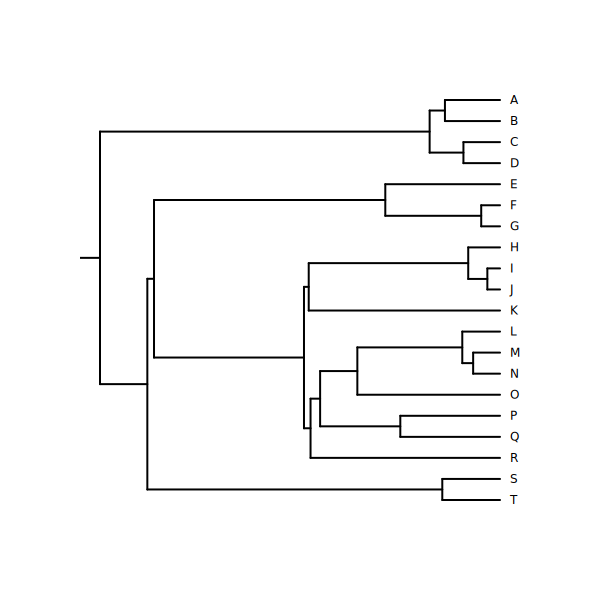

In [3]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)
v.add_leaf_names()
v.draw()
v.d

# Decorating a tree

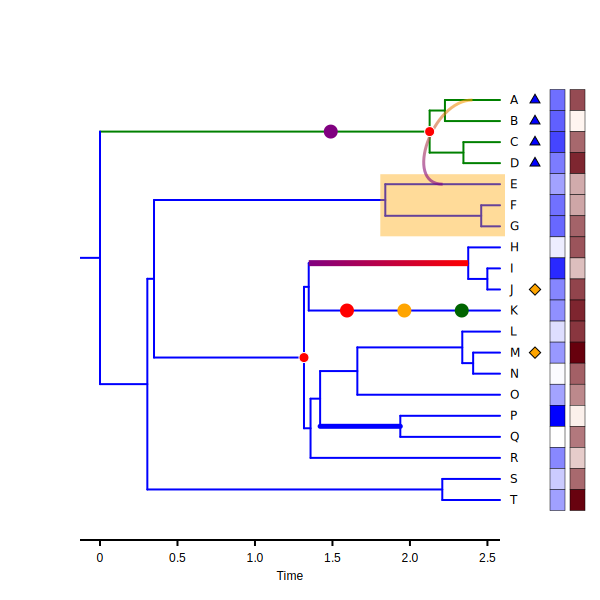

In [17]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline(), format=1)
    
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)

target = t.get_common_ancestor("A", "D") 
# Start by setting the "Background" color (Rest of the tree)
node_colors = {n: "blue" for n in t.traverse()}
for n in target.traverse():
    node_colors[n] = "green"

v.draw(branch2color=node_colors)
v.add_leaf_names()

# Adding shapes

v.add_leaf_shapes(leaves=["A", "B", "C", "D"],
    shape="triangle",
    fill="blue",
    size=10,
    stroke="black",
    stroke_width=1,
    offset=35,     # distance from the leaf tip
)

v.add_leaf_shapes(
    leaves=["J", "M"],
    shape="square",
    fill="orange",
    size=8,
    stroke="black",
    stroke_width=1,
    offset=35,
    rotation=45,
)

events = [
    {"branch": "K", "where": 0.2, "shape": "circle",  "fill": "red",  "size": 14},
    {"branch": "K", "where": 0.5, "shape": "circle",  "fill": "orange","size": 14},
    {"branch": "K", "where": 0.8, "shape": "circle",  "fill": "darkgreen", "size": 14},
]

v.add_branch_shapes(events, orient=None, offset=0)

target = t.get_common_ancestor("A", "D") 

events = [
    {"branch": target, "where": 0.7, "shape": "circle",  "fill": "purple",  "size": 14},
]

v.add_branch_shapes(events, orient=None, offset=0)

target = t.get_common_ancestor("E", "G") # To select inner nodes
v.highlight_clade(target, color="orange", opacity=0.4)

target = t.get_common_ancestor("P", "Q") 
v.highlight_branch(target, color="blue", size=5)


target = t.get_common_ancestor("H", "J") 
v.gradient_branch(target, colors=("purple", "red"), size=6)

transfer_data = [
    {"from": "E", "to": "A", "freq": 1.0},
]

v.plot_transfers(
    transfer_data,
    curve_type="C",       
    stroke_width=3,
    opacity=0.6,
    gradient_colors=("purple", "orange") 
)


v.add_time_axis(
    ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5], 
    label="Time", 
    y_offset=20  
)


# --- Column 1: "Expression" (Blue) ---
# Create fake data: {LeafName: Value}
data_col1 = {leaf.name: random.uniform(0, 1) for leaf in t.get_leaves()}

v.add_heatmap(
    data_col1,
    width=15,
    offset=50,             # Distance from tree tips (make room for labels)
    low_color="white",
    high_color="blue",
    border_color="black",  # optional border
    border_width=0.5
)

# --- Column 2: "Enrichment" (Red) ---
data_col2 = {leaf.name: random.uniform(0, 100) for leaf in t.get_leaves()}

# Calculate new offset: Previous Offset (50) + Previous Width (25) + Gap (5)
v.add_heatmap(
    data_col2,
    width=15,
    offset=70,             # Placed to the right of the first column
    low_color="#fff5f0",   # light reddish tint
    high_color="#67000d",  # dark red
    border_color="black",
    border_width=0.5
)

target1 = t.get_common_ancestor("A", "D") 
target2 = t.get_common_ancestor("H", "R") 
v.add_node_shapes([target1, target2], shape="circle", fill="red", size=10, stroke="white", stroke_width=1)

v.d



In [13]:
target1 = t.get_common_ancestor("E", "T")
target2 = t.get_common_ancestor("H", "J")

print("target1.name =", repr(target1.name))
print("target2.name =", repr(target2.name))


target1.name = ''
target2.name = ''


In [4]:
# SVG always works
v.save_svg("../examples/figures/vertical_tree.svg")

# PNG requires cairosvg (install: pip install "phylustrator[export]")
v.save_png("../examples/figures/vertical_tree.png", scale=3.0)
